# APRESENTAÇÃO

INTRODUÇÃO
Uma série temporal é uma sequência de dados coletados em intervalos de tempo regulares, onde a ordem dos dados é fundamental. Em outras palavras, é uma sequência de observações ordenadas cronologicamente.

Características principais:

Ordenação temporal: Os dados são organizados em ordem cronológica, permitindo a análise da evolução de um fenômeno ao longo do tempo.

Intervalos regulares: Os dados são coletados em intervalos de tempo constantes, como dias, semanas, meses ou anos.

Dependência temporal: Os valores em uma série temporal geralmente dependem dos valores anteriores, o que significa que o passado pode influenciar o futuro.

Esse projeto tem o objetivo de executar as seguintes ações baseadas na série temporal da ação MGLU3:

1) plotar o gráfico da série temporal;

2) Plotar grafico da media movel 5 dias e 30 dias em relação à série temporal;

3) Executar boxplot mensal da série;

4) FAzer uma tabela analítica mensal;

5) Plotar o gráfico CANDLESTICK da série.




# CÓDIGO

## 1. CONEXÕES, IMPORTAÇÕES E CARREGAMENTOS

2.1 - CONEXÕES

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.2 - IMPORTAÇÕES

In [167]:
!pip install plotly

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
print('Conectado')

Conectado


2.3 - CARREGAMENTOS

In [169]:
df=pd.read_csv('/content/drive/MyDrive/2_REPOSITORIOS/PYTHON/PTH_005_ANALISE_MGLU3/MGLU3 Dados Históricos.csv')
df.shape

(271, 7)

## 2. ETL

In [170]:
# Verificando se é necessário mudar o tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      271 non-null    object
 1   Último    271 non-null    object
 2   Abertura  271 non-null    object
 3   Máxima    271 non-null    object
 4   Mínima    271 non-null    object
 5   Vol.      269 non-null    object
 6   Var%      271 non-null    object
dtypes: object(7)
memory usage: 14.9+ KB


In [171]:
#VERIFICANDO O CONTEUDO DO BD
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.03.2025,"10,56","10,79","10,84","10,20","30,76M","-2,85%"
1,27.03.2025,"10,87","10,48","11,46","10,30","38,22M","3,62%"
2,26.03.2025,"10,49","10,58","10,74","10,31","27,43M","0,29%"
3,25.03.2025,"10,46","10,58","11,24","10,39","57,60M","2,45%"
4,24.03.2025,"10,21","10,15","10,25","9,95","23,29M","1,09%"


In [172]:
# Substituindo a virgula por ponto
df['Data'] = df['Data'].str.replace('.', '-')
df['Último'] = df['Último'].str.replace(',', '.')
df['Abertura'] = df['Abertura'].str.replace(',', '.')
df['Máxima'] = df['Máxima'].str.replace(',', '.')
df['Mínima'] = df['Mínima'].str.replace(',', '.')
df['Vol.'] = df['Vol.'].str.replace(',', '')
df['Var%'] = df['Var%'].str.replace(',', '.')

df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28-03-2025,10.56,10.79,10.84,10.20,3076M,-2.85%
1,27-03-2025,10.87,10.48,11.46,10.30,3822M,3.62%
2,26-03-2025,10.49,10.58,10.74,10.31,2743M,0.29%
3,25-03-2025,10.46,10.58,11.24,10.39,5760M,2.45%
4,24-03-2025,10.21,10.15,10.25,9.95,2329M,1.09%


In [173]:
# Removendo os caracteres não numericos
df['Vol.'] = df['Vol.'].str.replace('M', '')
df['Var%'] = df['Var%'].str.replace('%', '')

df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28-03-2025,10.56,10.79,10.84,10.20,3076,-2.85
1,27-03-2025,10.87,10.48,11.46,10.30,3822,3.62
2,26-03-2025,10.49,10.58,10.74,10.31,2743,0.29
3,25-03-2025,10.46,10.58,11.24,10.39,5760,2.45
4,24-03-2025,10.21,10.15,10.25,9.95,2329,1.09


In [174]:
#CONVERTENDO TIPOS DAS COLUNAS
df['Data']=pd.to_datetime(df['Data'])
df['Último'] = pd.to_numeric(df['Último'], errors='coerce').astype('Float64')
df['Abertura'] = pd.to_numeric(df['Abertura'], errors='coerce').astype('Float64')
df['Máxima'] = pd.to_numeric(df['Máxima'], errors='coerce').astype('Float64')
df['Mínima'] = pd.to_numeric(df['Mínima'], errors='coerce').astype('Float64')
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce').astype('Int64')
df['Var%'] = pd.to_numeric(df['Var%'], errors='coerce').astype('Float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      271 non-null    datetime64[ns]
 1   Último    271 non-null    Float64       
 2   Abertura  271 non-null    Float64       
 3   Máxima    271 non-null    Float64       
 4   Mínima    271 non-null    Float64       
 5   Vol.      269 non-null    Int64         
 6   Var%      271 non-null    Float64       
dtypes: Float64(5), Int64(1), datetime64[ns](1)
memory usage: 16.5 KB


In [175]:
# Corrigindo os valores cujos caracteres foram removidos para valores reais
df['Vol.'] = df['Vol.'] * 10000
df['Var%'] = df['Var%'] / 100
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-03-28,10.56,10.79,10.84,10.2,30760000,-0.0285
1,2025-03-27,10.87,10.48,11.46,10.3,38220000,0.0362
2,2025-03-26,10.49,10.58,10.74,10.31,27430000,0.0029
3,2025-03-25,10.46,10.58,11.24,10.39,57600000,0.0245
4,2025-03-24,10.21,10.15,10.25,9.95,23290000,0.0109


In [176]:
#VERIFICANDO A PRESENÇA DE CAMPOS NULOS/VAZIOS
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,2
Var%,0


In [177]:
#VERIFICANDO A EXISTENCIA DE DADOS DUPLICADO
df.duplicated().sum()

np.int64(0)

In [178]:
#ALTERANO O NOME DAS COLUNAS
df.rename(columns={
    'Último': 'ultimo',
    'Abertura': 'abertura',
    'Máxima': 'max',
    'Mínima':'min',
    'Vol.':'Volume',
    'Var%':'Variacao (%)'
}, inplace=True)
df.columns

Index(['Data', 'ultimo', 'abertura', 'max', 'min', 'Volume', 'Variacao (%)'], dtype='object')

In [179]:
df.head()

,Data,ultimo,abertura,max,min,Volume,Variacao (%)
0,2025-03-28,10.56,10.79,10.84,10.2,30760000,-0.0285
1,2025-03-27,10.87,10.48,11.46,10.3,38220000,0.0362
2,2025-03-26,10.49,10.58,10.74,10.31,27430000,0.0029
3,2025-03-25,10.46,10.58,11.24,10.39,57600000,0.0245
4,2025-03-24,10.21,10.15,10.25,9.95,23290000,0.0109


## 3. SÉRIES TEMPORAIS

Uma série temporal é uma sequência de dados coletados em intervalos de tempo regulares, onde a ordem dos dados é fundamental. Em outras palavras, é uma sequência de observações ordenadas cronologicamente.

Características principais:

Ordenação temporal: Os dados são organizados em ordem cronológica, permitindo a análise da evolução de um fenômeno ao longo do tempo.

Intervalos regulares: Os dados são coletados em intervalos de tempo constantes, como dias, semanas, meses ou anos.

Dependência temporal: Os valores em uma série temporal geralmente dependem dos valores anteriores, o que significa que o passado pode influenciar o futuro.

In [180]:
# Transformando a coluna Data em índice
dados=df.set_index('Data')
dados.head()

,ultimo,abertura,max,min,Volume,Variacao (%)
Data,,,,,,
2025-03-28,10.56,10.79,10.84,10.2,30760000,-0.0285
2025-03-27,10.87,10.48,11.46,10.3,38220000,0.0362
2025-03-26,10.49,10.58,10.74,10.31,27430000,0.0029
2025-03-25,10.46,10.58,11.24,10.39,57600000,0.0245
2025-03-24,10.21,10.15,10.25,9.95,23290000,0.0109


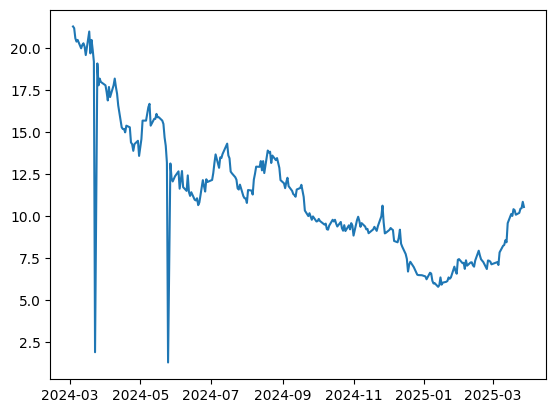

In [181]:
# Mostrar graficamente a série temporal
plt.plot(dados.index,dados['ultimo']);

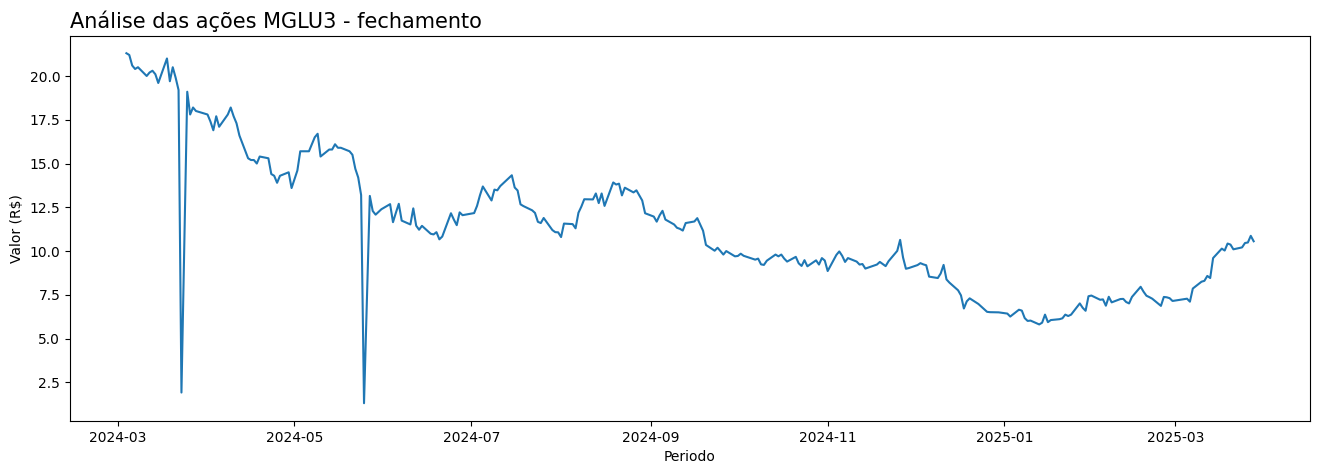

In [182]:
#1 Gráfico da série temporal
plt.figure(figsize=(16,5))
plt.title('Análise das ações MGLU3 - fechamento',fontsize=15,loc='left')
plt.plot(dados.index,dados['ultimo'])

plt.xlabel('Periodo')
plt.ylabel('Valor (R$)');

Text(0, 0.5, 'Valor (R$)')

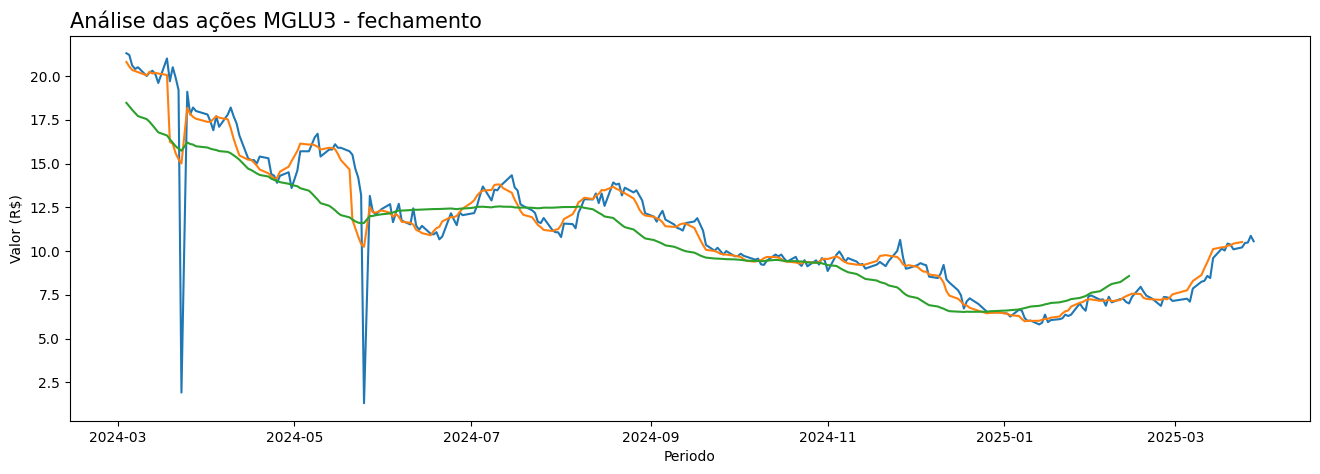

In [183]:
#2 Plotar grafico da media movel 5 dias e 30 dias em relação à série temporal

med_movel_5d = dados['ultimo'].rolling(5).mean()
med_movel_30d = dados['ultimo'].rolling(30).mean()

plt.figure(figsize=(16,5))
plt.title('Análise das ações MGLU3 - fechamento',fontsize=15,loc='left')

plt.plot(dados.index,dados['ultimo'])
plt.plot(dados.index,med_movel_5d)
plt.plot(dados.index,med_movel_30d)

plt.xlabel('Periodo')
plt.ylabel('Valor (R$)')

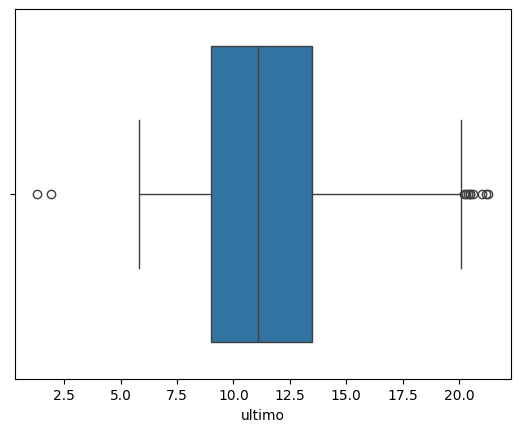

In [184]:
sns.boxplot(data=dados,x='ultimo');

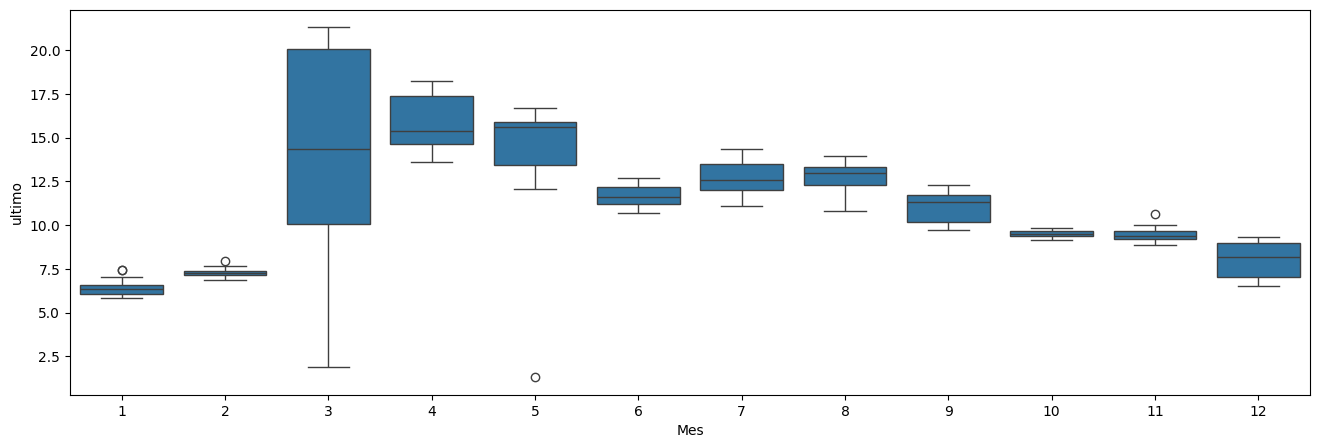

In [185]:
#3 boxplot mensal
df['Mes']=df['Data'].dt.month
df.head()

plt.figure(figsize=(16,5))
sns.boxplot(data=df,x='Mes',y='ultimo');

In [186]:
#4 TAbela analítica mensal
df.groupby(['Mes']).describe()['ultimo']

,count,mean,min,25%,50%,75%,max,std
Mes,,,,,,,,
1,22.0,6.399091,5.81,6.0725,6.33,6.5975,7.46,0.449263
2,20.0,7.281,6.87,7.135,7.275,7.38,7.96,0.251582
3,38.0,14.437368,1.92,10.0475,14.335,20.075,21.3,5.744296
4,22.0,15.95,13.6,14.625,15.35,17.375,18.2,1.50325
5,22.0,14.305455,1.31,13.45,15.6,15.875,16.7,3.23212
6,20.0,11.6625,10.67,11.185,11.585,12.1675,12.7,0.608638
7,23.0,12.647391,11.07,12.015,12.58,13.49,14.33,0.963248
8,22.0,12.780455,10.8,12.2775,12.955,13.335,13.92,0.868751
9,21.0,11.094762,9.7,10.19,11.33,11.69,12.3,0.842108


In [187]:
#5 PLOTAR O GRÁFICO DE CANDLESTICK

grafico = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open = dados['abertura'],
            high = dados['max'],
            low = dados['min'],
            close = dados['ultimo'],
        )
    ]

)

grafico.update_layout(xaxis_rangeslider_visible=False)

grafico.show()